In [44]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
sns.set(rc={
    'figure.figsize':(12,10),
})

In [46]:
tracks_lf = pl.scan_csv('data/music-info-clean.csv').with_columns(
    pl.col('genres').str.split(';').alias('genres')
)

tracks_lf.fetch(5)

track_id,name,artist,spotify_preview_url,spotify_id,year,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genres,playcount
str,str,str,str,str,i64,i64,f64,f64,i64,f64,i64,f64,f64,f64,f64,f64,f64,i64,list[str],i64
"""TRIODZU128E078…","""Under the Brid…","""Red Hot Chili …","""https://p.scdn…","""06zh28PcYIFvNO…",2003,265506,0.554,0.49,4,-8.046,1,0.0457,0.0168,0.000534,0.136,0.513,84.275,4,"[""rock"", ""alternative"", … ""90s""]",990
"""TRYEZGE128F92D…","""Feel Good Inc.…","""Gorillaz""","""https://p.scdn…","""09xrHi86kLkEIz…",2010,223106,0.809,0.72,6,-7.776,1,0.136,0.0337,0.00141,0.826,0.832,138.556,4,"[""alternative_rock"", ""british"", … ""alternative""]",98
"""TRIQWYH128F148…","""Paranoid Andro…","""Radiohead""","""https://p.scdn…","""0bomiLGPTUNyk3…",2012,384933,0.232,0.8,5,-6.863,1,0.0573,0.0523,0.00606,0.118,0.299,81.849,4,"[""britpop"", ""progressive_rock"", … ""indie""]",1075
"""TRUOEWJ128F934…","""Stairway to He…","""Led Zeppelin""","""https://p.scdn…","""03hLW9osM6UuNq…",2013,488019,0.354,0.361,9,-12.722,0,0.0509,0.625,0.0112,0.35,0.212,80.36,4,"[""70s"", ""punk"", … ""classic_rock""]",566
"""TRNNGMK128F423…","""Where Is My Mi…","""Pixies""","""https://p.scdn…","""0DJU6KGwdkxEPC…",2005,230093,0.514,0.435,4,-13.517,1,0.0353,0.0078,0.000859,0.0802,0.212,82.104,4,"[""indie"", ""indie_rock"", … ""soundtrack""]",32185


In [112]:
tracks_lf.collect().describe()

describe,track_id,name,artist,spotify_preview_url,spotify_id,year,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genres,playcount
str,str,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64
"""count""","""29477""","""29477""","""29477""","""29477""","""29477""",29477.0,29477.0,29477.0,29477.0,29477.0,29477.0,29477.0,29477.0,29477.0,29477.0,29477.0,29477.0,29477.0,29477.0,"""29477""",29477.0
"""null_count""","""0""","""0""","""0""","""0""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0""",0.0
"""mean""",null,null,null,null,null,2004.027479,251362.74017,0.482947,0.696299,5.316145,-8.163476,0.625437,0.076967,0.201649,0.24008,0.214124,0.417968,123.919578,3.892391,null,854.765919
"""std""",null,null,null,null,null,8.093433,107378.491427,0.180038,0.251637,3.568081,4.545636,0.484018,0.076046,0.296887,0.343431,0.180163,0.256129,29.750358,0.433714,null,4286.009152
"""min""","""TRAAAED128E078…","""#1""","""!!!""","""https://p.scdn…","""0000korRHja9p9…",1900.0,1439.0,0.0,0.0,0.0,-60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,1.0
"""max""","""TRZZZRJ128F428…","""鼓動""","""소녀시대""","""https://p.scdn…","""7zv1oGrjcxIG7e…",2020.0,2.51092e6,0.986,1.0,11.0,3.642,1.0,0.954,0.996,0.999,0.998,0.989,238.895,5.0,null,527893.0
"""median""",null,null,null,null,null,2006.0,235253.0,0.485,0.759,5.0,-7.051,1.0,0.0488,0.0307,0.0095,0.138,0.386,122.09,4.0,null,139.0
"""25%""",null,null,null,null,null,2001.0,192920.0,0.349,0.525,2.0,-10.177,0.0,0.0354,0.000962,0.0000278,0.0985,0.2,101.171,4.0,null,29.0
"""75%""",null,null,null,null,null,2009.0,289160.0,0.612,0.913,9.0,-4.993,1.0,0.0854,0.305,0.507,0.291,0.61,142.297,4.0,null,606.0


In [47]:
def get_column(lf: pl.LazyFrame, name: str) -> np.ndarray:
    return lf.select(pl.col(name)).collect().to_numpy().flatten()

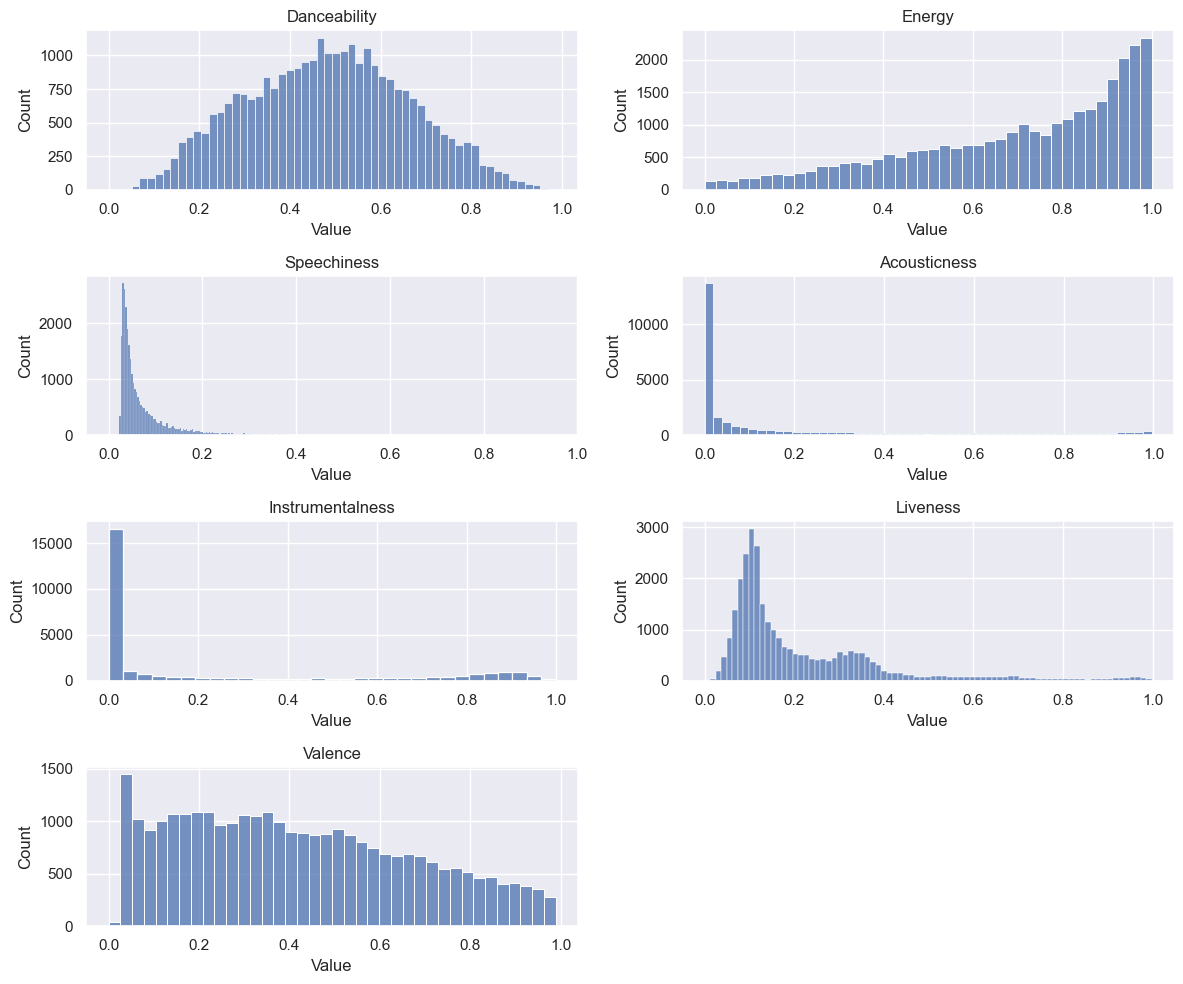

In [56]:
attributes = [
    'danceability',
    'energy',
    'speechiness',
    'acousticness',
    'instrumentalness',
    'liveness',
    'valence'
]

N = 8
fig, axes  = plt.subplots(nrows= N // 2, ncols=2)

for i, attribute in enumerate(attributes):
    ax: plt.Axes = axes[i // 2, i % 2]
    sns.histplot(x = get_column(tracks_lf, attribute), ax=ax)
    ax.set_xlabel('Value')
    ax.set_ylabel('Count')
    ax.set_title(attribute.capitalize())

axes[N // 2 - 1, 2 - 1].remove()

plt.tight_layout()
plt.show()

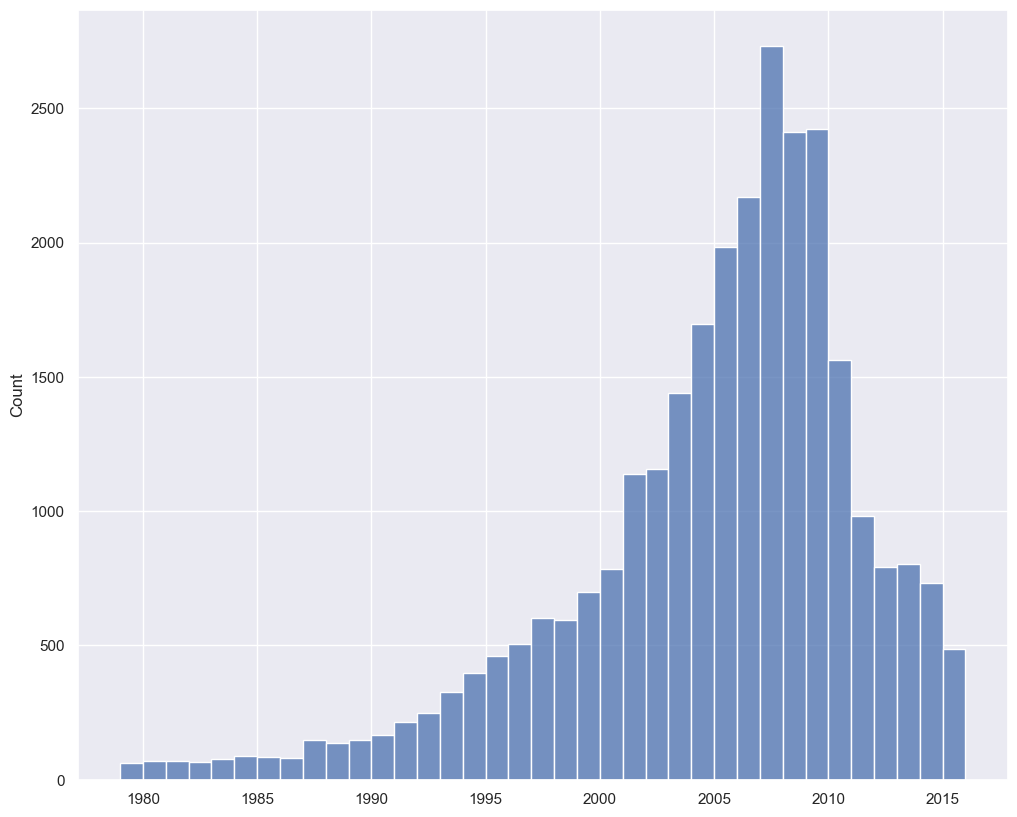

In [107]:
outlier_offset = 0.02

years_lf = tracks_lf.select([
    pl.col('year'),
    pl.col('playcount')
]).filter(
    pl.col('year').is_between(
        pl.col('year').quantile(outlier_offset),
        pl.col('year').quantile(1 - outlier_offset)
    )
)

sns.histplot(x = get_column(years_lf, 'year'), binwidth=1)
plt.show()

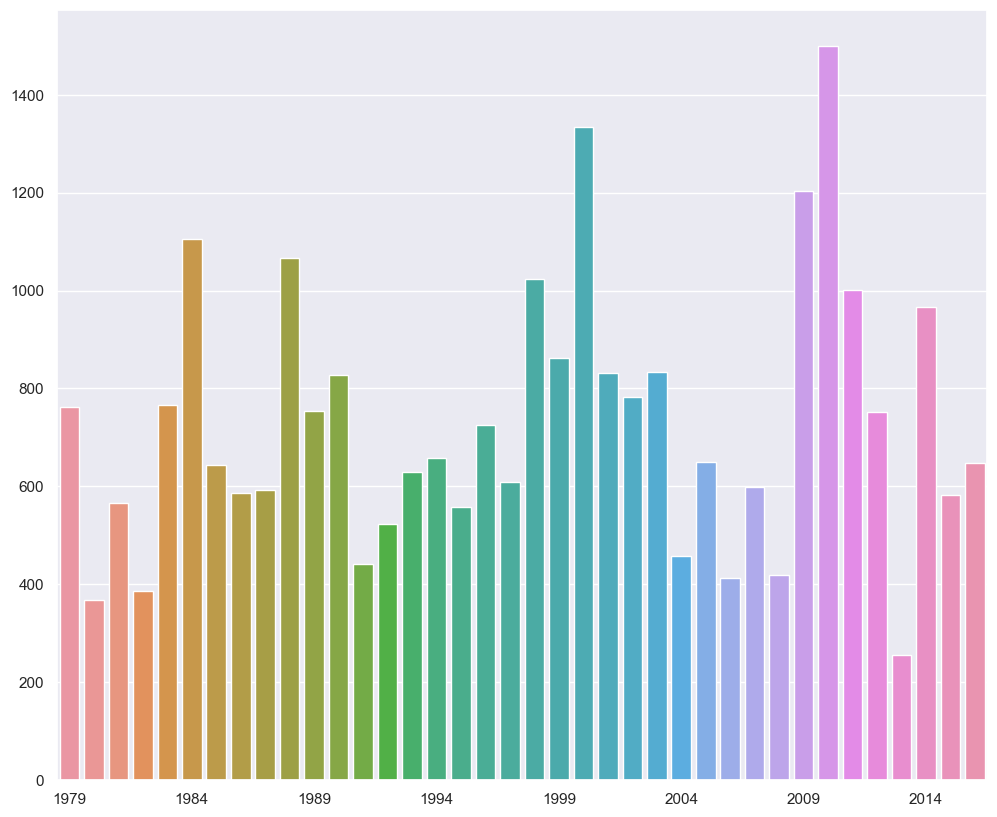

In [144]:
most_popular_years_lf = years_lf.groupby('year').agg([
    pl.sum('playcount').alias('all playcount'),
    pl.count()
]).with_columns([
    (pl.col('all playcount') / pl.col('count')).alias('playcount per track')
])

years = get_column(most_popular_years_lf, 'year')

ax = sns.barplot(x = years, y = get_column(most_popular_years_lf, 'playcount per track'))

step = 5
target_ticks_range = np.arange(years.min(), years.max() + 1, step)
current_ticks = ax.get_xticks()
current_ticks_range = np.arange(current_ticks.min(), current_ticks.max() + 1, step)

ax.set_xticks(current_ticks_range)
ax.set_xticklabels([plt.Text(x, 0, target_ticks_range[i]) for i, x in enumerate(current_ticks_range)])

plt.show()

In [49]:
artist_popularity_lf = tracks_lf.select([
    pl.col('artist'),
    pl.col('playcount')
]).groupby('artist').sum().join(
    other=tracks_lf.select('artist').groupby('artist').count().rename({'count':'tracks'}),
    on='artist'
).sort(by='playcount', descending=True)

artist_popularity_lf.collect()

artist,playcount,tracks
str,i64,u32
"""Kings of Leon""",597299,20
"""The Black Keys…",336178,53
"""Justin Bieber""",231001,18
"""Coldplay""",203320,43
"""Radiohead""",179341,64
"""Jack Johnson""",177147,32
"""Modest Mouse""",174356,42
"""Metallica""",166292,53
"""John Mayer""",160425,19


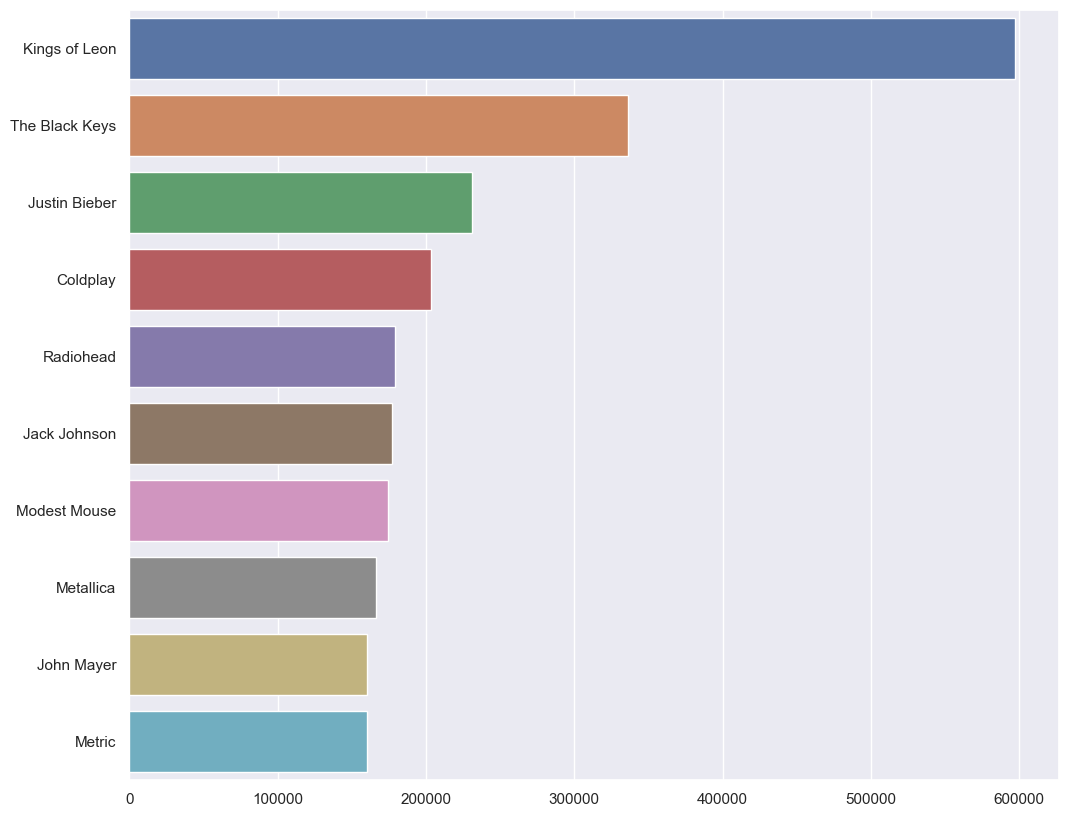

In [50]:
top_artists_lf = artist_popularity_lf.head(10)
sns.barplot(y=get_column(top_artists_lf, 'artist'), x=get_column(top_artists_lf, 'playcount'), orient='h')
plt.show()

In [51]:
top1_artist = top_artists_lf.select(pl.col('artist')).head(1).collect().item()
print('Artist with the highest playcount is "{}"'.format(top1_artist))

top1_artist_tracks_lf = tracks_lf.select([
    pl.col('name'),
    pl.col('artist'),
    pl.col('playcount')
]).filter(
    pl.col('artist') == top1_artist
).sort('playcount', descending=True)
top1_artist_tracks_lf.collect()

Artist with the highest playcount is "Kings of Leon"


name,artist,playcount
str,str,i64
"""Revelry""","""Kings of Leon""",527893
"""Molly's Chambe…","""Kings of Leon""",20761
"""Ragoo""","""Kings of Leon""",12494
"""Joe's Head""","""Kings of Leon""",7269
"""California Wai…","""Kings of Leon""",5614
"""Velvet Snow""","""Kings of Leon""",4890
"""Rememo""","""Kings of Leon""",4483
"""Charmer""","""Kings of Leon""",4280
"""Trani""","""Kings of Leon""",3650


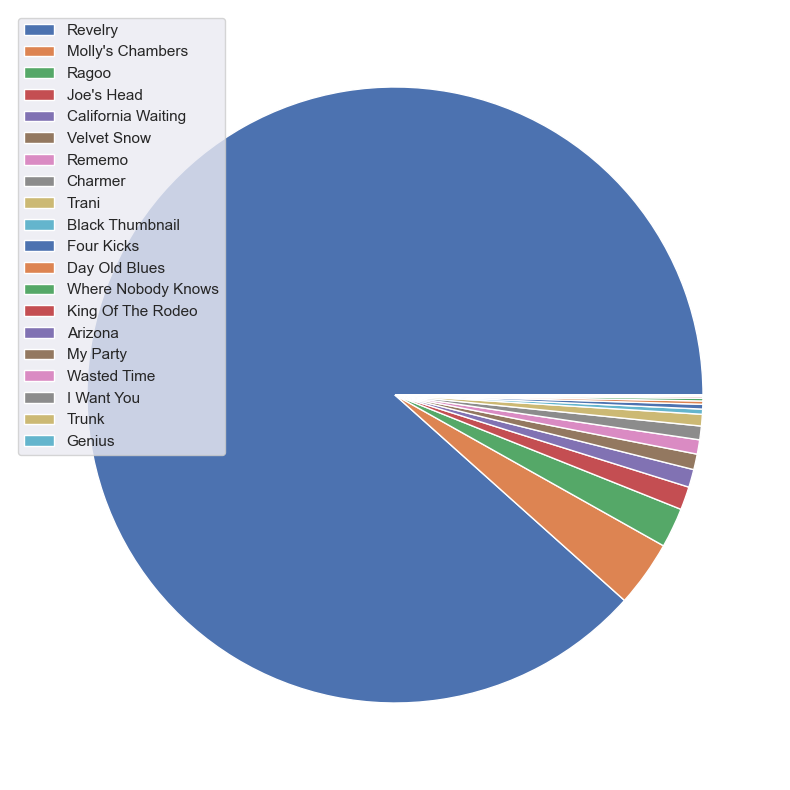

In [52]:
plt.pie(get_column(top1_artist_tracks_lf, 'playcount'))
plt.legend(labels=get_column(top1_artist_tracks_lf, 'name'))
plt.show()

In [53]:
tracks_lf.select([
    pl.col('artist'),
    pl.col('name'),
    pl.col('playcount'),
]).sort(by='playcount', descending=True).limit(10).collect()

artist,name,playcount
str,str,i64
"""Kings of Leon""","""Revelry""",527893
"""Lady Gaga""","""Alejandro""",111615
"""Miss May I""","""Gears""",111596
"""Depeche Mode""","""Halo""",91461
"""Katherine Jenk…","""Bring Me To Li…",91448
"""John Mayer""","""Heartbreak War…",87745
"""Sabaton""","""Uprising""",87050
"""Modest Mouse""","""Float On""",85079
"""The Barden Bel…","""Party In The U…",78443


In [55]:
with open('tmp/tag-list-filtered.txt', 'r') as f:
    genre_list = f.read().split('\n')

tracks_genres_lf = tracks_lf.explode('genres').rename({'genres':'genre'}).filter(pl.col('genre').is_in(genre_list))
tracks_genres_lf.collect()

track_id,name,artist,spotify_preview_url,spotify_id,year,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre,playcount
str,str,str,str,str,i64,i64,f64,f64,i64,f64,i64,f64,f64,f64,f64,f64,f64,i64,str,i64
"""TRIODZU128E078…","""Under the Brid…","""Red Hot Chili …","""https://p.scdn…","""06zh28PcYIFvNO…",2003,265506,0.554,0.49,4,-8.046,1,0.0457,0.0168,0.000534,0.136,0.513,84.275,4,"""rock""",990
"""TRIODZU128E078…","""Under the Brid…","""Red Hot Chili …","""https://p.scdn…","""06zh28PcYIFvNO…",2003,265506,0.554,0.49,4,-8.046,1,0.0457,0.0168,0.000534,0.136,0.513,84.275,4,"""alternative""",990
"""TRIODZU128E078…","""Under the Brid…","""Red Hot Chili …","""https://p.scdn…","""06zh28PcYIFvNO…",2003,265506,0.554,0.49,4,-8.046,1,0.0457,0.0168,0.000534,0.136,0.513,84.275,4,"""alternative_ro…",990
"""TRIODZU128E078…","""Under the Brid…","""Red Hot Chili …","""https://p.scdn…","""06zh28PcYIFvNO…",2003,265506,0.554,0.49,4,-8.046,1,0.0457,0.0168,0.000534,0.136,0.513,84.275,4,"""funk""",990
"""TRIODZU128E078…","""Under the Brid…","""Red Hot Chili …","""https://p.scdn…","""06zh28PcYIFvNO…",2003,265506,0.554,0.49,4,-8.046,1,0.0457,0.0168,0.000534,0.136,0.513,84.275,4,"""pop""",990
"""TRYEZGE128F92D…","""Feel Good Inc.…","""Gorillaz""","""https://p.scdn…","""09xrHi86kLkEIz…",2010,223106,0.809,0.72,6,-7.776,1,0.136,0.0337,0.00141,0.826,0.832,138.556,4,"""alternative_ro…",98
"""TRYEZGE128F92D…","""Feel Good Inc.…","""Gorillaz""","""https://p.scdn…","""09xrHi86kLkEIz…",2010,223106,0.809,0.72,6,-7.776,1,0.136,0.0337,0.00141,0.826,0.832,138.556,4,"""trip_hop""",98
"""TRYEZGE128F92D…","""Feel Good Inc.…","""Gorillaz""","""https://p.scdn…","""09xrHi86kLkEIz…",2010,223106,0.809,0.72,6,-7.776,1,0.136,0.0337,0.00141,0.826,0.832,138.556,4,"""dance""",98
"""TRYEZGE128F92D…","""Feel Good Inc.…","""Gorillaz""","""https://p.scdn…","""09xrHi86kLkEIz…",2010,223106,0.809,0.72,6,-7.776,1,0.136,0.0337,0.00141,0.826,0.832,138.556,4,"""hip_hop""",98


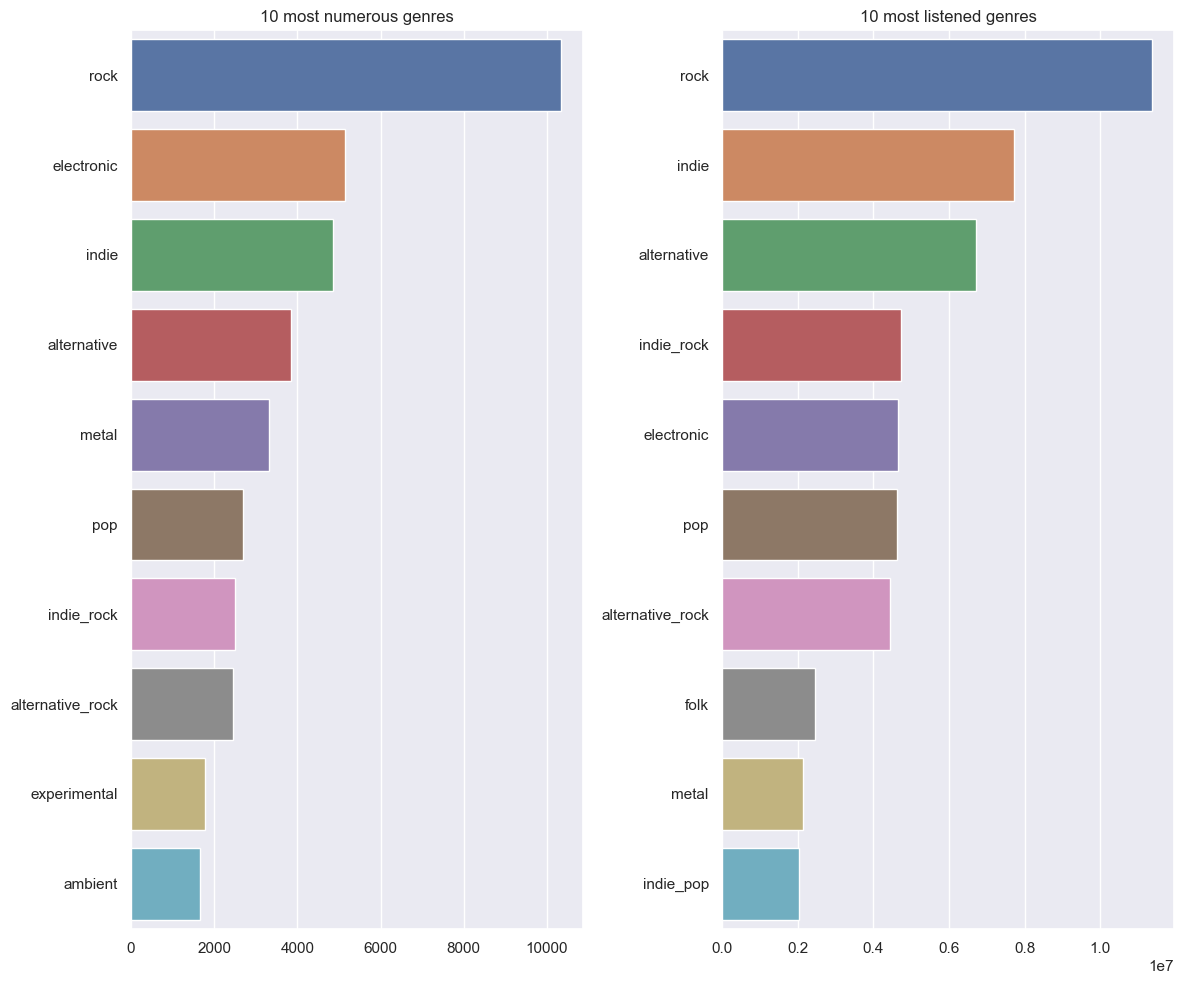

In [77]:
fig, axes = plt.subplots(ncols=2)

genre_counts_lf = tracks_genres_lf.groupby('genre').count().sort(by='count', descending=True).limit(10)
sns.barplot(orient='h', x = get_column(genre_counts_lf, 'count'), y = get_column(genre_counts_lf, 'genre'), ax=axes[0])
axes[0].set_title('10 most numerous genres')

genre_counts_lf = tracks_genres_lf.select([
    pl.col('genre'),
    pl.col('playcount')
]).groupby('genre').sum().sort(by='playcount', descending=True).limit(10)
sns.barplot(orient='h', x = get_column(genre_counts_lf, 'playcount'), y = get_column(genre_counts_lf, 'genre'), ax=axes[1])
axes[1].set_title('10 most listened genres')

plt.tight_layout()
plt.show()